In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import squarify

# import the IO functions 
import plotly.io as pio
# import low-level API
import plotly.graph_objects as go
# import high-level API
import plotly.express as px

from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('./World Energy Consumption.csv')
data.sort_values(by=['year'], inplace=True)

data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
6562,Europe,1900,NaN,406610221.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9412,Iran,1900,IRN,10122370.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8339,Guatemala,1900,GTM,1352626.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15258,Oceania,1900,NaN,5936615.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16332,Poland,1900,POL,24312686.0,6.682500e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22012 entries, 6562 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.8+ MB


In [4]:
data.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [5]:
# sadly, not all countries have data for all years
# we want to find out how many countries have data for each year

# count the number of countries with a data point for each year
country_count_per_year = data.groupby('year')['country'].nunique()

country_count_per_year.head(10)

year
1900    118
1901    118
1902    118
1903    118
1904    118
1905    118
1906    118
1907    118
1908    118
1909    118
Name: country, dtype: int64

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

C:\Users\David\AppData\Local\Temp\ipykernel_20728\2073187333.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [7]:
merged = world.merge(data, left_on='iso_a3', right_on='iso_code')
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,year,iso_code,population,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1980,FJI,644596.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1981,FJI,660640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1982,FJI,676973.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1983,FJI,693598.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1984,FJI,710567.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,2018,SSD,10395332.0,...,1.786,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
14388,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,2019,SSD,10447677.0,...,1.786,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
14389,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,2020,SSD,10606224.0,...,1.852,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
14390,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,2021,SSD,10748278.0,...,1.754,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [8]:
# filter our entries without an ISO code
# these are regions, not countries
country_data = data[pd.isna(data["iso_code"]) == False]

In [9]:
# plot using plotly
# version 1: animated

fig = px.choropleth(country_data, locations="iso_code",
                    color="electricity_demand",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Sunset,
                    width=2000, height=1000,
                    # labels={'Historical and more recent literacy estimates':'Literacy Rate (%)'},
                    animation_frame="year")

fig.show()

In [10]:
# plot using plotly
# show year 2000

fig = px.choropleth(country_data[country_data["year"] == 2000], locations="iso_code",
                    color="electricity_demand",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Sunset,
                    width=2000, height=1000,
                    animation_frame="year")

fig.show()

In [11]:
# plot using plotly
# show year 2020

fig = px.choropleth(country_data[country_data["year"] == 2020], locations="iso_code",
                    color="electricity_demand",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Sunset,
                    width=2000, height=1000,
                    animation_frame="year")

fig.show()

In [12]:
year1 = 2000
year2 = 2020

year1_data = country_data[country_data["year"] == year1]
year2_data = country_data[country_data["year"] == year2]

min_value = 0
max_value = max(year1_data["energy_per_capita"].max(), year2_data["energy_per_capita"].max())

def normalize_value(value):
    return (value - min_value) / max_value - min_value

colorscale = [
    [0, "#e8e8d8"],
    [normalize_value(5), "#e8e8d8"],
    [normalize_value(5), "#fefecc"],
    [normalize_value(10), "#fefecc"],
    [normalize_value(10), "#c7e8b5"],
    [normalize_value(100), "#c7e8b5"],
    [normalize_value(100), "#7fcdbb"],
    [normalize_value(500), "#7fcdbb"],
    [normalize_value(500), "#41b6c4"],
    [normalize_value(1000), "#41b6c4"],
    [normalize_value(1000), "#2c7eb9"],
    [normalize_value(2000), "#2c7eb9"],
    [normalize_value(2000), "#253494"],
    [1, "#253494"]
]

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "choropleth"}, {"type": "choropleth"}]])

fig.add_choropleth(row=1, col=1, locations=year1_data["iso_code"], z=year1_data["energy_per_capita"], text = year1_data['energy_per_capita'], hovertemplate="%{text} TWh", zmin=min_value, zmax=max_value, colorscale=colorscale)
fig.add_choropleth(row=1, col=2, locations=year2_data["iso_code"], z=year2_data["energy_per_capita"], text = year2_data['energy_per_capita'], hovertemplate="%{text} TWh", zmin=min_value, zmax=max_value, colorscale=colorscale)

fig.show()

In [13]:
country_names = data['country']
country_names.head()

6562        Europe
9412          Iran
8339     Guatemala
15258      Oceania
16332       Poland
Name: country, dtype: object

In [14]:
years = data['year'].unique()
years

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

Text(0, 0.5, 'Electricity Demand (TWh)')

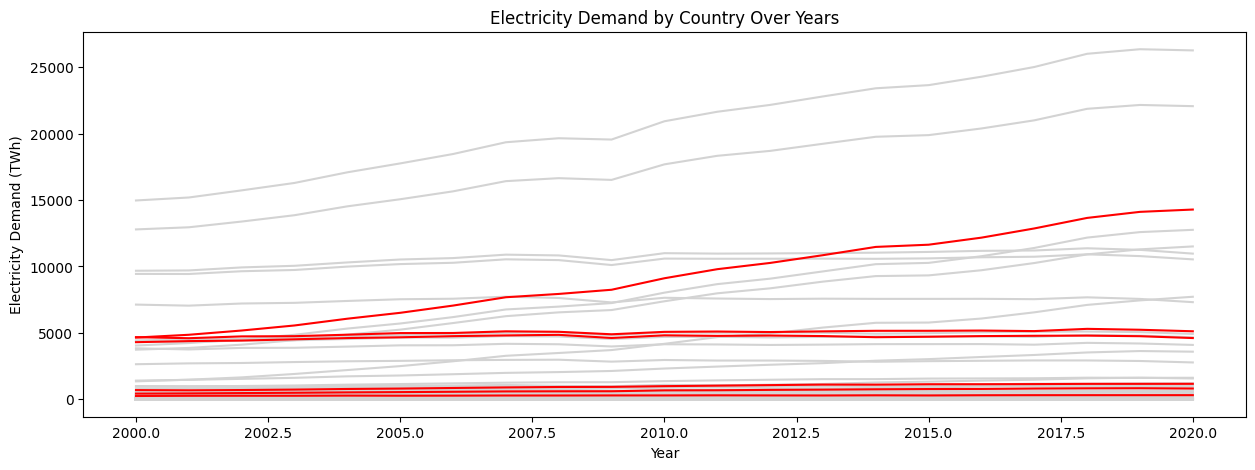

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))

countries_to_highlight = ["Europe", "Asia", "South America", "North America", "Africa", "Oceania"]

electricity_demand_data = data[['country', 'year', 'electricity_demand', 'iso_code']]
electricity_demand_data = electricity_demand_data.dropna(subset=['electricity_demand'])
electricity_demand_data = electricity_demand_data[electricity_demand_data['year'] >= 2000]
electricity_demand_data = electricity_demand_data[electricity_demand_data['year'] <= 2020]

# Plotting

for country in electricity_demand_data['country'].unique():
    color = 'red' if country in countries_to_highlight else 'lightgrey'
    zorder = 2 if country in countries_to_highlight else 1

    sns.lineplot(data=electricity_demand_data[electricity_demand_data['country'] == country], 
                    x='year', y='electricity_demand', color=color, legend=False, ax=ax, label=country, zorder=zorder)

ax.set_title('Electricity Demand by Country Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Demand (TWh)')


In [16]:
regions = ['Europe', 'Asia', 'South America', 'North America', 'Africa', 'Oceania']
region_colors = {
    'Europe': 'blue',
    'Asia': 'red',
    'South America': 'green',
    'North America': 'purple',
    'Africa': 'orange',
    'Oceania': 'brown'
}

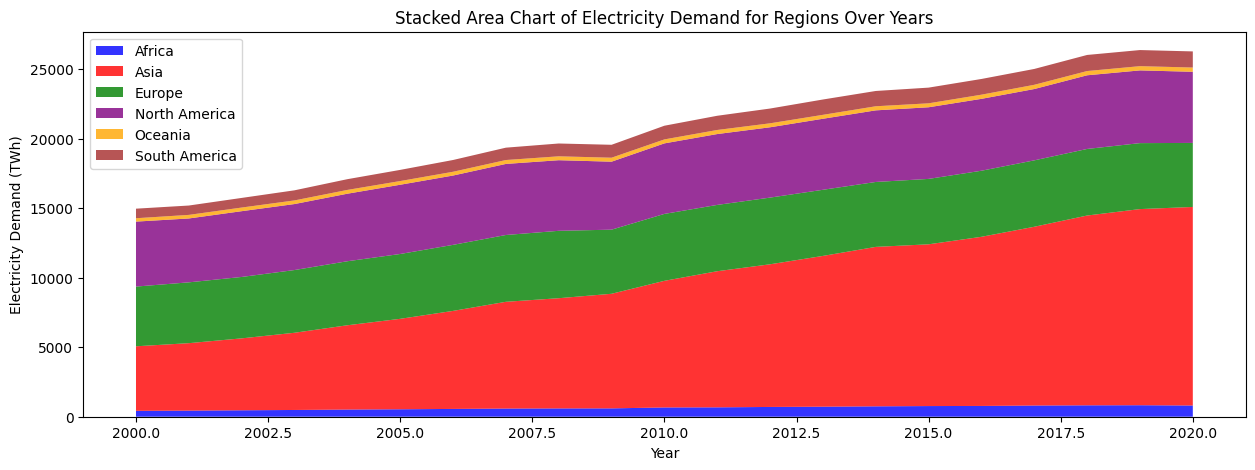

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))

energy_data_filtered = electricity_demand_data[(electricity_demand_data['country'].isin(regions))]
pivot_data = energy_data_filtered.pivot(index='year', columns='country', values='electricity_demand').fillna(0)

# for region in regions:
#     ax.fill_between(pivot_data.index, pivot_data[region], color=region_colors[region], alpha=0.8, label=region)

ax.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns, alpha=0.8,
             colors=[region_colors[region] for region in regions])
ax.set_title('Stacked Area Chart of Electricity Demand for Regions Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Demand (TWh)')
ax.legend(loc='upper left')

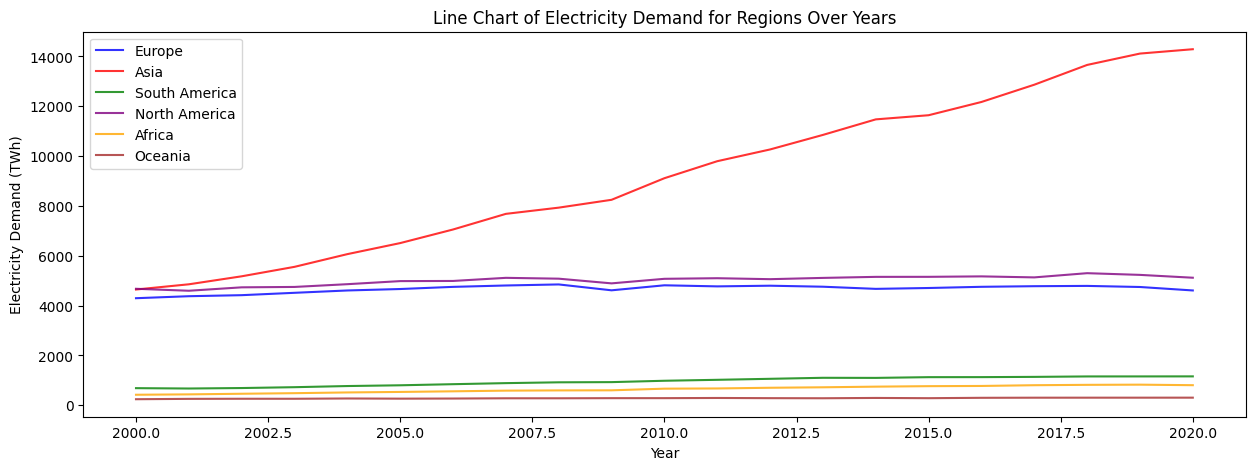

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))

for region in regions:
    ax.plot(pivot_data.index, pivot_data[region], color=region_colors[region], alpha=0.8, label=region)

ax.set_title('Line Chart of Electricity Demand for Regions Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Demand (TWh)')
ax.legend(loc='upper left')

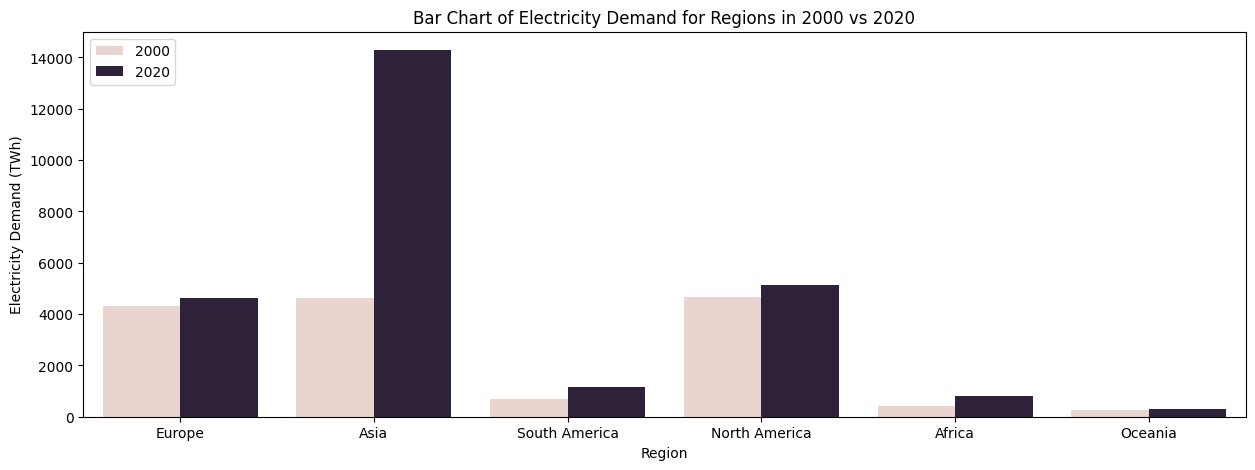

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))

first_year = pivot_data.index.min()
last_year = pivot_data.index.max()

first_year_data = pivot_data.loc[first_year]
last_year_data = pivot_data.loc[last_year]

df = pd.DataFrame(columns=['year', 'region', 'electricity_demand'], data=[[first_year, region, first_year_data[region]] for region in regions] + [[last_year, region, last_year_data[region]] for region in regions])

# plot using seaborn
p = sns.barplot(data=df, x='region', y='electricity_demand', hue='year', ax=ax)
p.set_title('Bar Chart of Electricity Demand for Regions in 2000 vs 2020')
p.set_xlabel('Region')
p.set_ylabel('Electricity Demand (TWh)')
p.legend(loc='upper left')

In [20]:
# calculate the percentage change in electricity demand for each region and as a whole
# we will use the first and last years of the dataset for this
first_year_total = pivot_data.loc[first_year].sum()
last_year_total = pivot_data.loc[last_year].sum()

total_change = (last_year_total - first_year_total) / first_year_total * 100
print(f'Total change in electricity demand from {first_year} to {last_year}: {total_change:.2f}%')

for region in regions:
    first_year_region = pivot_data.loc[first_year][region]
    last_year_region = pivot_data.loc[last_year][region]

    region_change = (last_year_region - first_year_region) / first_year_region * 100
    print(f'Change in electricity demand for {region} from {first_year} to {last_year}: {region_change:.2f}%')

Total change in electricity demand from 2000 to 2020: 75.59%
Change in electricity demand for Europe from 2000 to 2020: 7.24%
Change in electricity demand for Asia from 2000 to 2020: 207.56%
Change in electricity demand for South America from 2000 to 2020: 68.75%
Change in electricity demand for North America from 2000 to 2020: 9.49%
Change in electricity demand for Africa from 2000 to 2020: 90.79%
Change in electricity demand for Oceania from 2000 to 2020: 25.75%


In [21]:
electricity_mix_data = data[['country', 'year', 'iso_code', 'coal_share_elec', 'oil_share_elec', 'gas_share_elec', 'hydro_share_elec', 'nuclear_share_elec', 'wind_share_elec', 'solar_share_elec', 'biofuel_share_elec']]
electricity_mix_data = electricity_mix_data[electricity_mix_data['year'] >= 2000]
electricity_mix_data = electricity_mix_data[electricity_mix_data['year'] <= 2020]

electricity_mix_filtered = electricity_mix_data[(electricity_mix_data['country'].isin(["World"]))]
electricity_mix_filtered

,country,year,iso_code,coal_share_elec,oil_share_elec,gas_share_elec,hydro_share_elec,nuclear_share_elec,wind_share_elec,solar_share_elec,biofuel_share_elec
21609,World,2000,NaN,38.199,8.079,17.908,17.509,16.748,0.208,0.007,0.993
21610,World,2001,NaN,38.175,7.881,18.607,16.853,16.936,0.251,0.009,0.942
21611,World,2002,NaN,38.493,7.472,19.283,16.534,16.538,0.331,0.011,0.995
21612,World,2003,NaN,39.643,7.354,19.431,15.973,15.822,0.389,0.013,1.031
21613,World,2004,NaN,39.183,6.889,19.939,16.361,15.695,0.499,0.016,1.080
21614,World,2005,NaN,39.636,6.677,20.153,16.298,15.126,0.585,0.021,1.173
21615,World,2006,NaN,40.278,5.939,20.531,16.250,14.733,0.719,0.028,1.196
21616,World,2007,NaN,40.975,5.783,21.229,15.736,13.777,0.883,0.036,1.256
21617,World,2008,NaN,40.323,5.488,21.417,16.435,13.510,1.119,0.058,1.315
21618,World,2009,NaN,39.963,5.138,21.715,16.510,13.389,1.410,0.098,1.429


In [22]:
first_year_data = electricity_mix_filtered[electricity_mix_filtered['year'] == first_year]
last_year_data = electricity_mix_filtered[electricity_mix_filtered['year'] == last_year]

first_year_data

,country,year,iso_code,coal_share_elec,oil_share_elec,gas_share_elec,hydro_share_elec,nuclear_share_elec,wind_share_elec,solar_share_elec,biofuel_share_elec
21609,World,2000,NaN,38.199,8.079,17.908,17.509,16.748,0.208,0.007,0.993


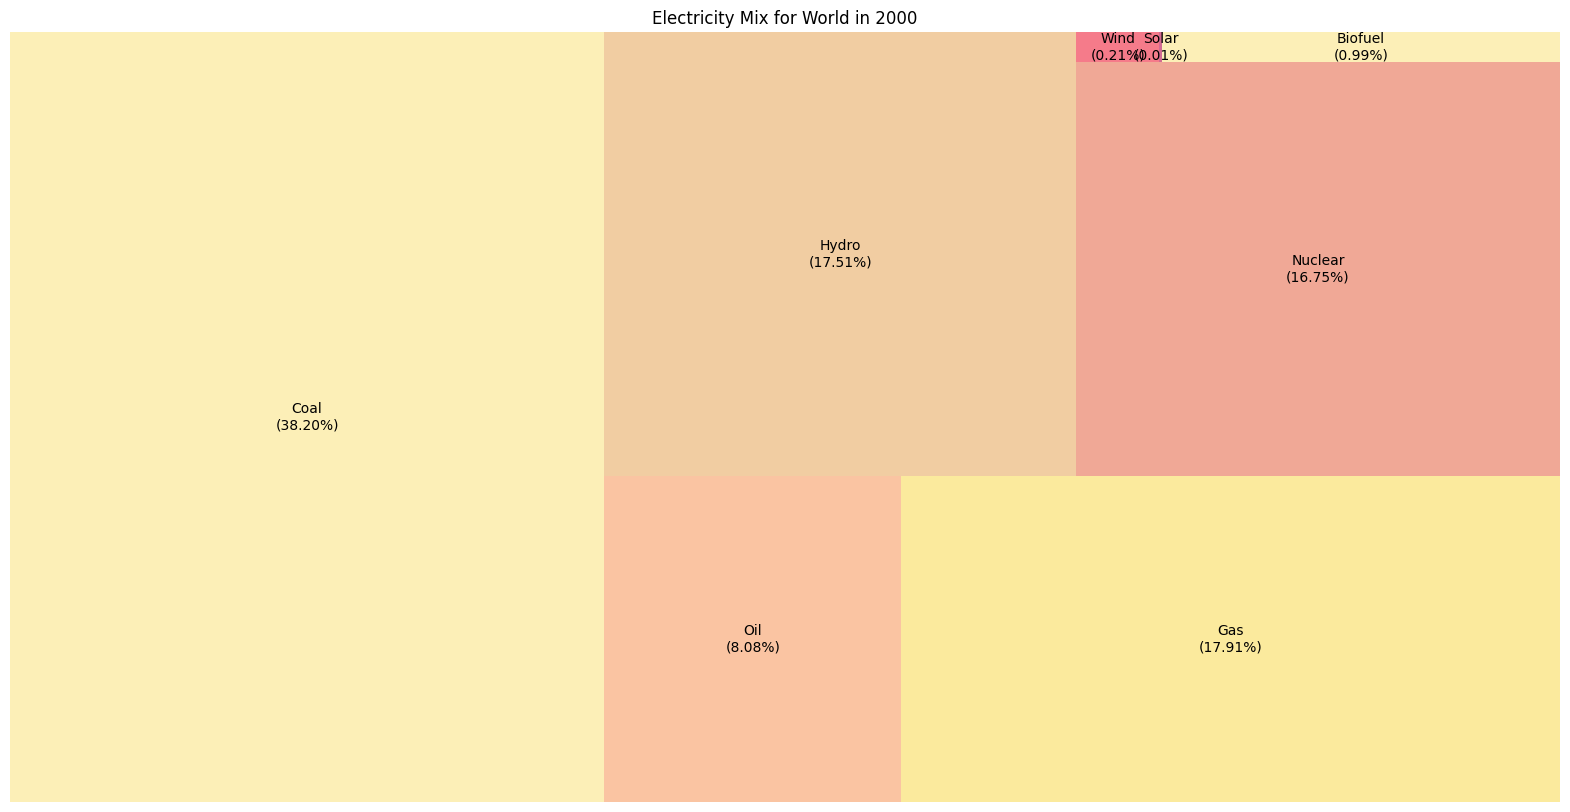

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

region = "World"
square_data = first_year_data[first_year_data['country'] == region].drop(columns=['country', 'year', 'iso_code']).T
labels = [str.capitalize(str.split(square_data.index[i], "_")[0]) for i in range(len(square_data))]

# add the percentage to the label
for i in range(len(square_data)):
    labels[i] += f'\n({square_data.values[i][0]:.2f}%)'

squarify.plot(sizes=square_data.values, label=labels, alpha=0.6, ax=ax, color=colors).set(title='Electricity Mix for ' + region + ' in ' + str(first_year))
ax.set_axis_off()

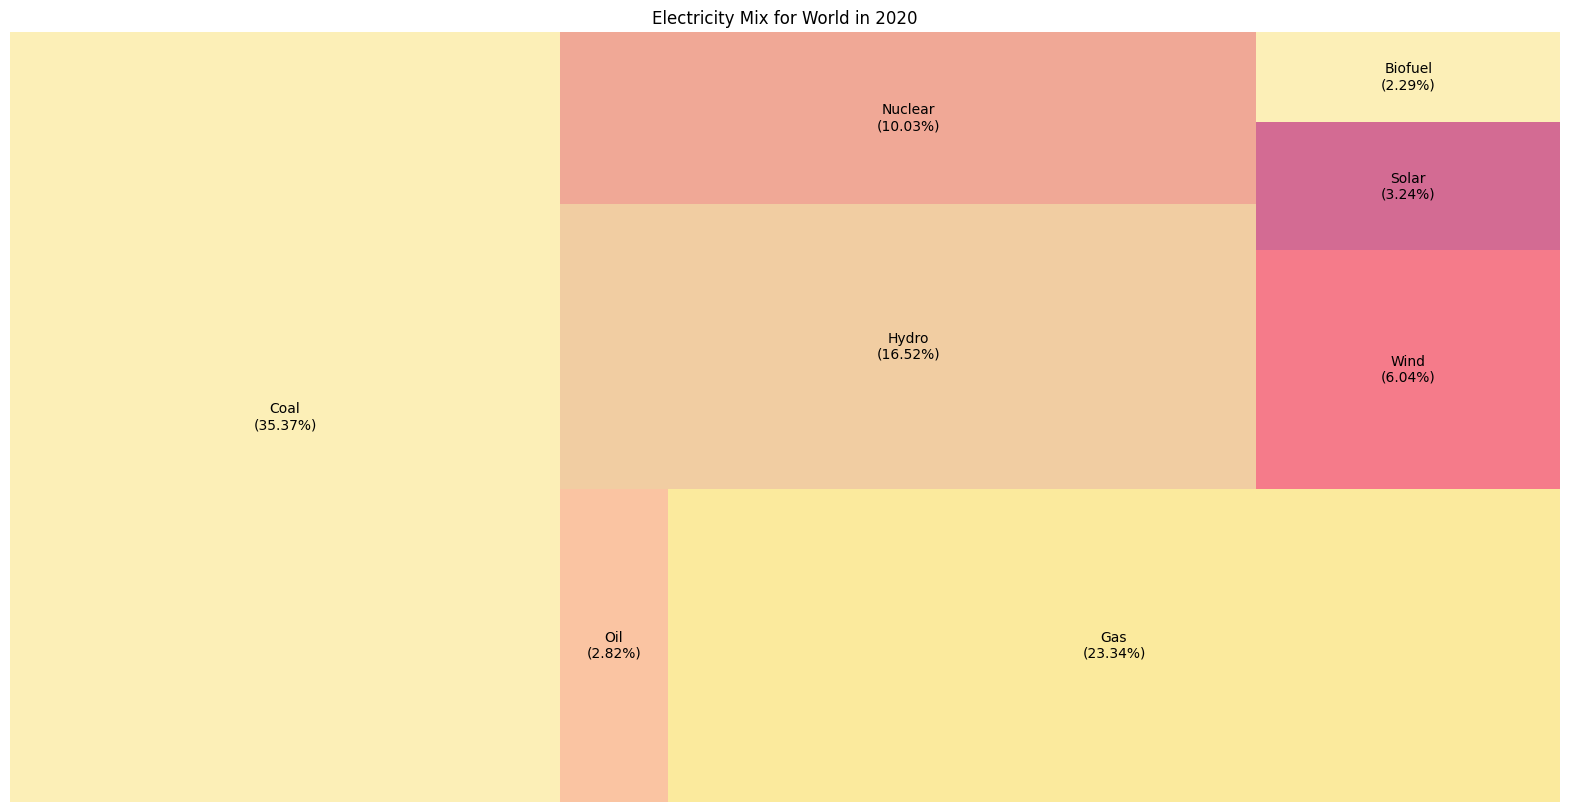

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

region = "World"
square_data = last_year_data[last_year_data['country'] == region].drop(columns=['country', 'year', 'iso_code']).T
labels = [str.capitalize(str.split(square_data.index[i], "_")[0]) for i in range(len(square_data))]

# add the percentage to the label
for i in range(len(square_data)):
    labels[i] += f'\n({square_data.values[i][0]:.2f}%)'

squarify.plot(sizes=square_data.values, label=labels, alpha=0.6, ax=ax, color=colors).set(title='Electricity Mix for ' + region + ' in ' + str(last_year))
ax.set_axis_off()